### Q3 cv2.adaptiveThreshold

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [2]:
# 각 블록의 평균값 계산을 위한 함수
def mean_function(img, dimh, dimw, h, w): 
   slice = img[h:h+dimh, w:w+dimw]
   mean = np.mean(slice)
   return mean

# 각 블록의 중앙값 계산을 위한 함수
def medain_function(img, dimh, dimw, h, w):
   slice = img[h:h+dimh, w:w+dimw]
   median = np.median(slice)
   return median

# 각 블록의 최대최소 평균값 계산을 위한 함수
def maxmin_mean_function(img, dimh, dimw, h, w):
   slice = img[h:h+dimh, w:w+dimw]
   max = int(np.max(slice))
   min = int(np.min(slice))

   return (max+min)/2


In [3]:
img = cv2.imread('./img/peppers.jpg')
RGB_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
gray_img = cv2.cvtColor(RGB_img, cv2.COLOR_RGB2GRAY)

# 가로세로 블록의 개수 
N=25

# 블록 당 가로와 세로 크기 계산 
dimh = np.int32(gray_img.shape[0] / N)
dimw = np.int32(gray_img.shape[1] / N)

# 연산에서 제외될 영상 가장자리 크기 계산 
dh_rest = np.int32(gray_img.shape[0] % N)
dw_rest = np.int32(gray_img.shape[1] % N)

# 임계값 적용 후 이진 영상을 담을 기억 장소 생성 
mean_img = np.zeros((N, N)) # 블록의 평균값 저장 배열
median_img = np.zeros((N, N)) # 블록의 중앙값 저장 배열
maxmin_mean_img = np.zeros((N, N)) # 블록의 최대 최소 평균값 저장 배열

binary_mean_img = np.zeros((gray_img.shape[0], gray_img.shape[1]))
binary_median_img = np.zeros((gray_img.shape[0], gray_img.shape[1]))
binary_maxmin_mean_img = np.zeros((gray_img.shape[0], gray_img.shape[1]))

# 각 블록의 평균값, 중앙값, 최대최소평균값 계산
for h in range(0, img.shape[0] - dh_rest, dimh):
    for w in range(0, img.shape[1] - dw_rest, dimw):
        if(h + dimh < img.shape[0] and w + dimw < img.shape[1]):
            mean_img[np.int32(h/dimh), np.int32(w/dimw)] = mean_function(gray_img, dimh, dimw, h, w)
            median_img[np.int32(h/dimh), np.int32(w/dimw)] = medain_function(gray_img, dimh, dimw, h, w)
            maxmin_mean_img[np.int32(h/dimh), np.int32(w/dimw)] = maxmin_mean_function(gray_img, dimh, dimw, h, w)


In [4]:
# 평균을 이진화 임계값으로
for h in range(0, gray_img.shape[0] - dh_rest):
    for w in range(0, gray_img.shape[1] - dw_rest):
        if(gray_img[h, w] >= mean_img[np.int32(h/dimh), np.int32(w/dimw)]):
            binary_mean_img[h, w] = 255
        else:
            binary_mean_img[h, w] = 0

# 중앙값을 이진화 임계값으로
for h in range(0, gray_img.shape[0] - dh_rest):
    for w in range(0, gray_img.shape[1] - dw_rest):
        if(gray_img[h, w] >= median_img[np.int32(h/dimh), np.int32(w/dimw)]):
            binary_median_img[h, w] = 255
        else:
            binary_median_img[h, w] = 0 

# 최대최소 평균을 이진화 임계값으로
for h in range(0, gray_img.shape[0] - dh_rest):
    for w in range(0, gray_img.shape[1] - dw_rest):
        if(gray_img[h, w] >= maxmin_mean_img[np.int32(h/dimh), np.int32(w/dimw)]):
            binary_maxmin_mean_img[h, w] = 255
        else:
            binary_maxmin_mean_img[h, w] = 0 

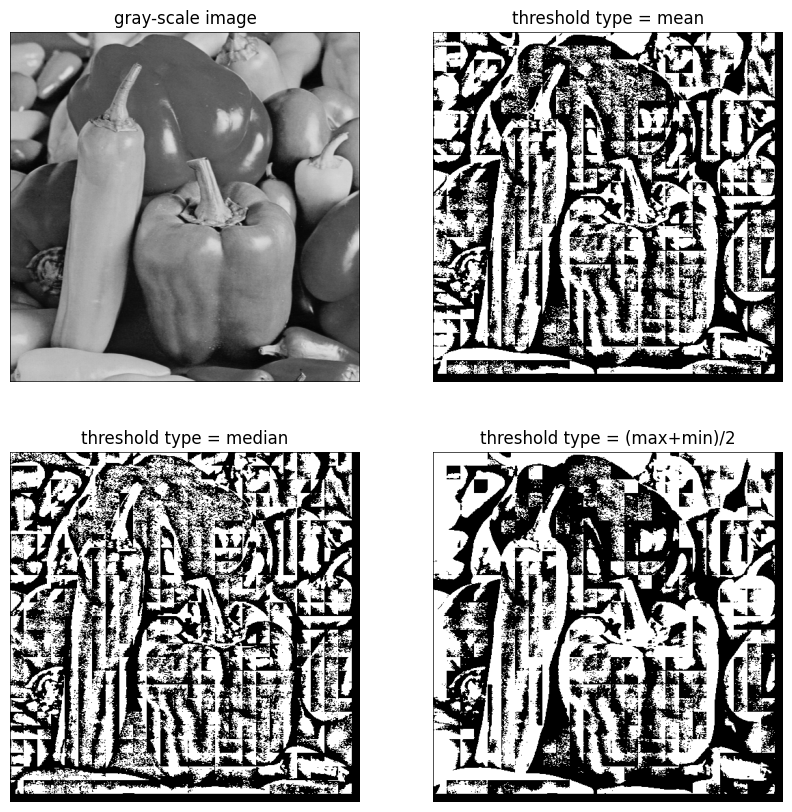

In [5]:
#그림을 화면에 출력
plt.figure(figsize=(10, 10))

plt.subplot(221)
plt.title("gray-scale image")
plt.axis("off")
plt.imshow(gray_img, 'gray')

plt.subplot(222)
plt.title("threshold type = mean")
plt.axis("off")
plt.imshow(binary_mean_img, 'gray')

plt.subplot(223)
plt.title("threshold type = median")
plt.axis("off")
plt.imshow(binary_median_img, 'gray')

plt.subplot(224)
plt.title("threshold type = (max+min)/2")
plt.axis("off")
plt.imshow(binary_maxmin_mean_img, 'gray')

plt.show()